# Importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
import os
from sklearn.metrics import silhouette_score

# Load the dataset and Display the first few rows of the dataset

In [ ]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Statistical summary of the dataset

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Dropping unnecessary columns

In [ ]:
data.drop('CustomerID',axis=1,inplace=True)

# Displaying the cleaned data

In [ ]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Plotting the initial relationship between Annual Income and Spending Score

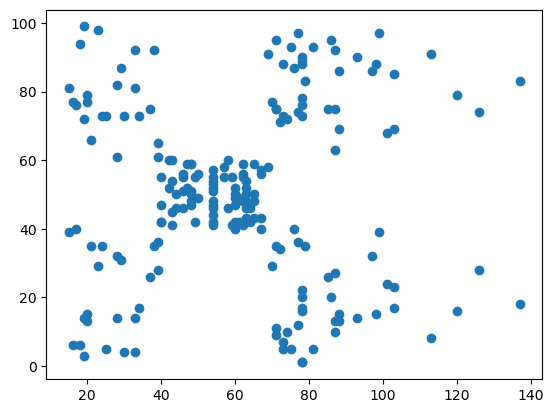

In [ ]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])
plt.show()

# Pairplot to visualize relationships with Gender as hue

<Figure size 1600x1000 with 0 Axes>

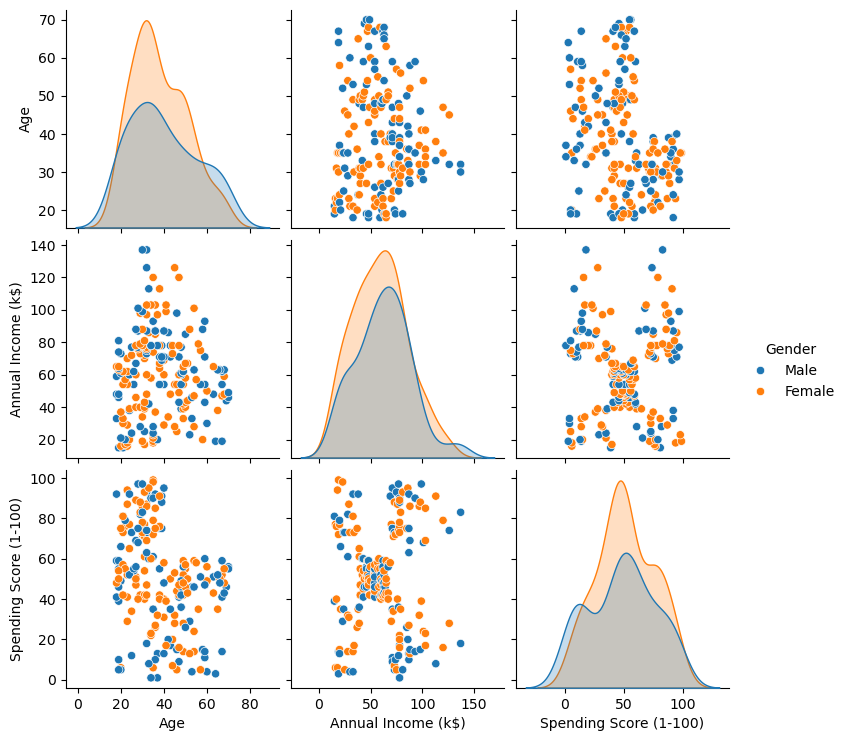

In [ ]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=data, hue='Gender')
plt.show()

# Count plot for Gender distribution

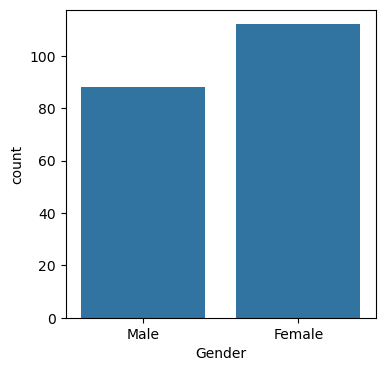

In [ ]:
plt.figure(1, figsize=(4,4))
sns.countplot(x='Gender', data=data)
plt.show()

# Distribution plots for Age, Annual Income, and Spending Score

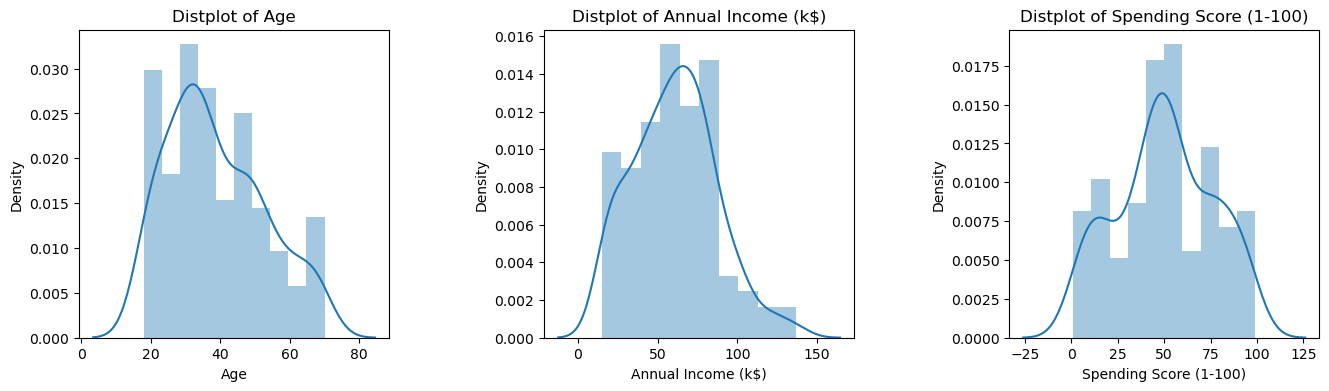

In [ ]:
plt.figure(1, figsize=(16,4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(data[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

# Extracting relevant features for clustering

In [ ]:
final= data.iloc[:, [2,3]].values
final

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Elbow method to determine the optimal number of clusters

In [ ]:
ilist=[]
n=11
for i in range(1,n):
    km=KMeans(n_clusters=i)
    km.fit_predict(final)
    ilist.append(km.inertia_)

# Plotting the elbow curve

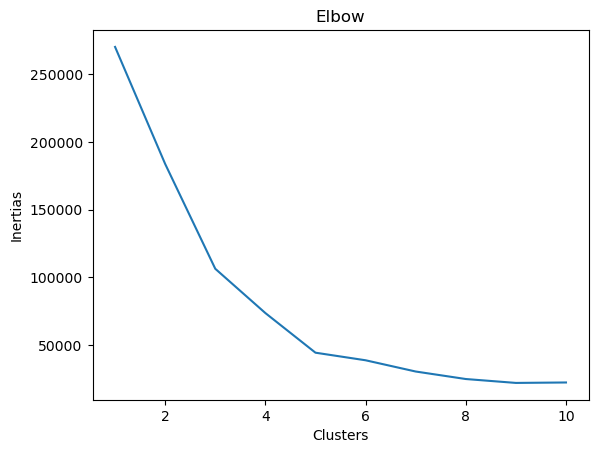

In [ ]:
plt.plot(range(1,n),ilist)
plt.title("Elbow")
plt.xlabel("Clusters")
plt.ylabel('Inertias')
plt.show()

# Silhouette scores for each number of clusters

In [ ]:
ilist

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 38858.9599751439,
 30566.45113025186,
 25030.38309852033,
 22155.14949036471,
 22480.68996297149]

# Apply KMeans clustering with 5 clusters

In [ ]:
km=KMeans(n_clusters=5)
y_pred=km.fit_predict(final)
y_pred

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2])

# Adding cluster labels to the dataset

In [ ]:
data['Cluster']=y_pred
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,1
2,Female,20,16,6,4
3,Female,23,16,77,1
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,2
197,Male,32,126,74,2
198,Male,32,137,18,2


# Visualizing clusters with centroids

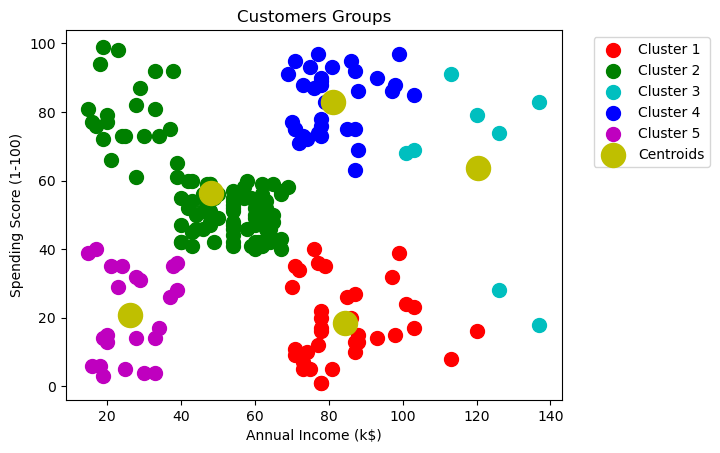

In [ ]:
plt.scatter(final[y_pred == 0,0],final[y_pred == 0,1] ,label='Cluster 1',c='r',s=100)
plt.scatter(final[y_pred == 1,0],final[y_pred == 1,1] ,label='Cluster 2',c='g',s=100)
plt.scatter(final[y_pred == 2,0],final[y_pred == 2,1] ,label='Cluster 3',c='c',s=100)
plt.scatter(final[y_pred == 3,0],final[y_pred == 3,1] ,label='Cluster 4',c='b',s=100)
plt.scatter(final[y_pred == 4,0],final[y_pred == 4,1] ,label='Cluster 5',c='m',s=100)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],label='Centroids',c="y",s=300)

plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Customers Groups")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()